<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Session-11/Conjoint_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully. Available columns:
Index(['bundleID', 'starter', 'maindishI', 'maindishII', 'side', 'dessert',
       'avg_rating'],
      dtype='object')

Data preview:
   bundleID                starter    maindishI maindishII  \
0         1  Fried Chicken Tenders  BBQ Brisket    Sausage   
1         2  Fried Chicken Tenders  BBQ Brisket    Sausage   
2         3  Fried Chicken Tenders  BBQ Brisket    Sausage   
3         4  Fried Chicken Tenders  BBQ Brisket    Sausage   
4         5  Fried Chicken Tenders  BBQ Brisket    Sausage   

                 side              dessert  avg_rating  
0      Mac and Cheese      Blondie Brownie        6.04  
1      Mac and Cheese  Apple Pie a la Mode        9.29  
2        Potato Salad      Blondie Brownie        6.20  
3        Potato Salad  Apple Pie a la Mode        8.84  
4  French Fry Platter      Blondie Brownie        8.24  

Regression Summary:
                            OLS Regression Results                            
Dep. 

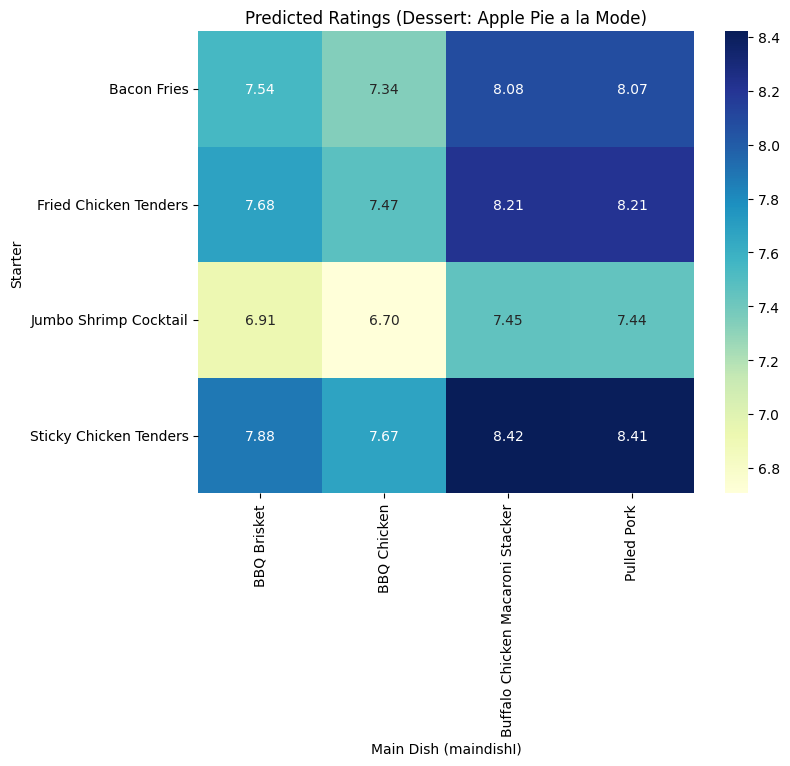

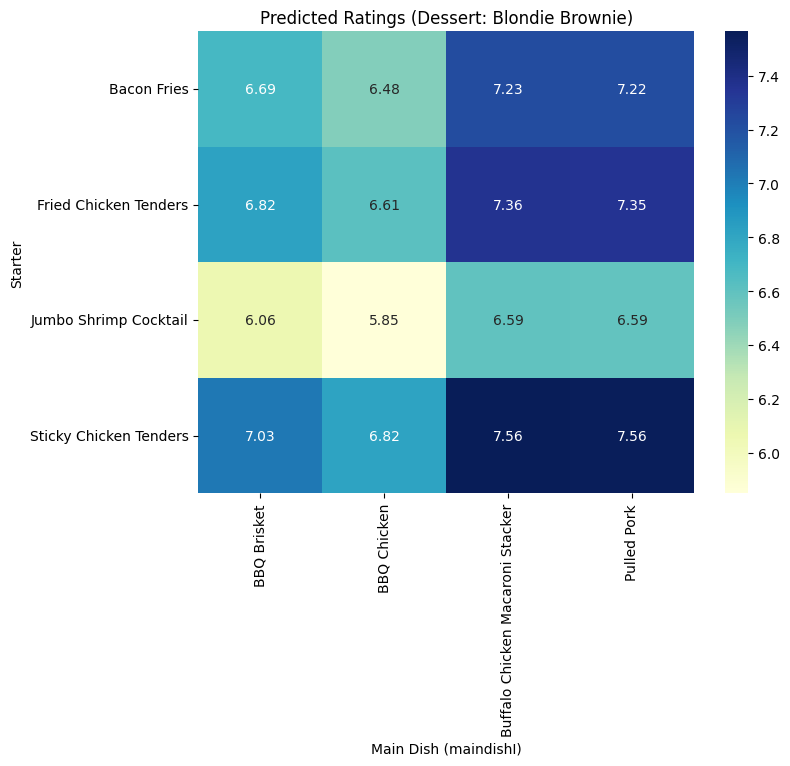


Regression Coefficients (Part-Worth Utilities):
Intercept                                           7.544604
C(starter)[T.Fried Chicken Tenders]                 0.133571
C(starter)[T.Jumbo Shrimp Cocktail]                -0.630588
C(starter)[T.Sticky Chicken Tenders]                0.339275
C(maindishI)[T.BBQ Chicken]                        -0.209208
C(maindishI)[T.Buffalo Chicken Macaroni Stacker]    0.536821
C(maindishI)[T.Pulled Pork]                         0.529312
C(dessert)[T.Blondie Brownie]                      -0.856204
dtype: float64


<ipython-input-8-33b9f628824c>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(starter_utilities.keys()), y=list(starter_utilities.values()), palette="pastel")


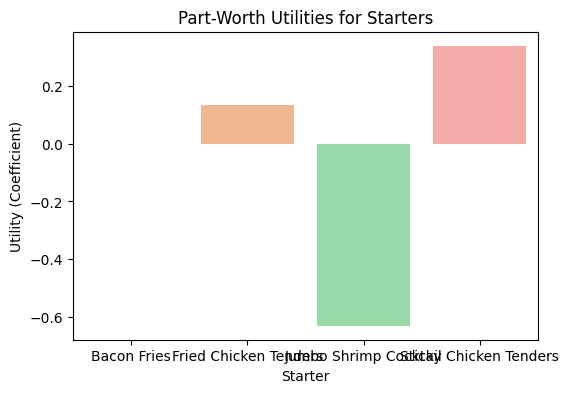

<ipython-input-8-33b9f628824c>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(maindish_utilities.keys()), y=list(maindish_utilities.values()), palette="pastel")


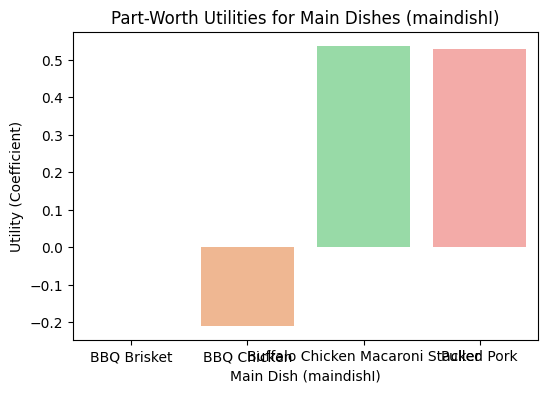

<ipython-input-8-33b9f628824c>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dessert_utilities.keys()), y=list(dessert_utilities.values()), palette="pastel")


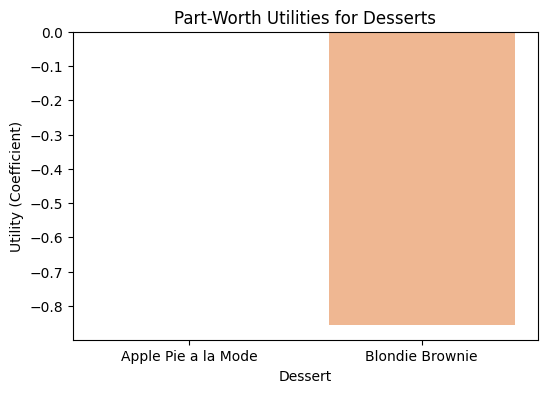


Best and Worst Levels based on Part-Worth Utilities:
Starter - Best: Sticky Chicken Tenders (Utility: 0.339), Worst: Jumbo Shrimp Cocktail (Utility: -0.631)
Main Dish (maindishI) - Best: Buffalo Chicken Macaroni Stacker (Utility: 0.537), Worst: BBQ Chicken (Utility: -0.209)
Dessert - Best: Apple Pie a la Mode (Utility: 0.000), Worst: Blondie Brownie (Utility: -0.856)


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from itertools import product

# For inline plots in Colab
%matplotlib inline

# ===============================
# 1. Read the Data File
# ===============================
# Update the file path below to point to your uploaded file.
# Your file should contain the columns:
# 'bundleID', 'starter', 'maindishI', 'maindishII', 'side', 'dessert', 'avg_rating'
file_path = '/content/bbq_summer.csv'  # <-- Change this to your file's path if needed.
df = pd.read_csv(file_path)

# Print available columns and preview the data.
print("Data loaded successfully. Available columns:")
print(df.columns)
print("\nData preview:")
print(df.head())

# ===============================
# 2. Conjoint Analysis via Regression
# ===============================
# We use the following attributes:
# - starter
# - maindishI (using this as the main dish attribute)
# - dessert
# And we use 'avg_rating' as the response variable.
formula = 'avg_rating ~ C(starter) + C(maindishI) + C(dessert)'
model = smf.ols(formula, data=df).fit()

print("\nRegression Summary:")
print(model.summary())

# ===============================
# 3. Create All Possible Combinations & Predict Ratings
# ===============================
# Get unique levels from the data for each attribute.
starters   = sorted(df['starter'].unique())
maindishes = sorted(df['maindishI'].unique())
desserts   = sorted(df['dessert'].unique())

# Create a grid of all possible combinations of starter, main dish, and dessert.
all_combinations = pd.DataFrame(list(product(starters, maindishes, desserts)),
                                columns=['starter', 'maindishI', 'dessert'])

# Predict ratings for each combination using the fitted model.
all_combinations['PredictedRating'] = model.predict(all_combinations)

print("\nPredicted Ratings for All Combinations:")
print(all_combinations.head())

# Identify the best and worst overall combinations based on predicted rating.
best_combo = all_combinations.loc[all_combinations['PredictedRating'].idxmax()]
worst_combo = all_combinations.loc[all_combinations['PredictedRating'].idxmin()]

print("\nBest Overall Combination (Highest Predicted Rating):")
print(best_combo)
print("\nWorst Overall Combination (Lowest Predicted Rating):")
print(worst_combo)

# ===============================
# 4. Visualize Predicted Ratings via Heatmaps
# ===============================
# Since we have three attributes, we fix 'dessert' for each heatmap.
# Each heatmap shows the predicted ratings (color) for combinations of starter vs main dish.
for d in desserts:
    subset = all_combinations[all_combinations['dessert'] == d]
    pivot_table = subset.pivot(index='starter', columns='maindishI', values='PredictedRating')

    plt.figure(figsize=(8,6))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f"Predicted Ratings (Dessert: {d})")
    plt.xlabel("Main Dish (maindishI)")
    plt.ylabel("Starter")
    plt.show()

# ===============================
# 5. Visualize Part-Worth Utilities for Each Attribute
# ===============================
# Extract regression coefficients.
coef = model.params
print("\nRegression Coefficients (Part-Worth Utilities):")
print(coef)

# Helper function to extract utilities for a given attribute.
def get_utilities(attribute, levels):
    utilities = {}
    for level in levels:
        # Statsmodels names non-baseline levels as: "C(attribute)[T.level]"
        param_name = f"C({attribute})[T.{level}]"
        # If the parameter is not found, it is the baseline (utility = 0)
        utilities[level] = coef[param_name] if param_name in coef else 0
    return utilities

# Get utilities for each attribute.
starter_utilities   = get_utilities('starter', starters)
maindish_utilities  = get_utilities('maindishI', maindishes)
dessert_utilities   = get_utilities('dessert', desserts)

# Bar plot for starter utilities.
plt.figure(figsize=(6,4))
sns.barplot(x=list(starter_utilities.keys()), y=list(starter_utilities.values()), palette="pastel")
plt.title("Part-Worth Utilities for Starters")
plt.xlabel("Starter")
plt.ylabel("Utility (Coefficient)")
plt.show()

# Bar plot for main dish utilities.
plt.figure(figsize=(6,4))
sns.barplot(x=list(maindish_utilities.keys()), y=list(maindish_utilities.values()), palette="pastel")
plt.title("Part-Worth Utilities for Main Dishes (maindishI)")
plt.xlabel("Main Dish (maindishI)")
plt.ylabel("Utility (Coefficient)")
plt.show()

# Bar plot for dessert utilities.
plt.figure(figsize=(6,4))
sns.barplot(x=list(dessert_utilities.keys()), y=list(dessert_utilities.values()), palette="pastel")
plt.title("Part-Worth Utilities for Desserts")
plt.xlabel("Dessert")
plt.ylabel("Utility (Coefficient)")
plt.show()

# ===============================
# 6. Identify the Best and Worst Levels for Each Attribute
# ===============================
# Function to determine the best (highest utility) and worst (lowest utility) levels.
def best_and_worst(utilities):
    sorted_util = sorted(utilities.items(), key=lambda x: x[1])
    worst = sorted_util[0]    # Lowest utility
    best  = sorted_util[-1]   # Highest utility
    return best, worst

best_starter, worst_starter = best_and_worst(starter_utilities)
best_maindish, worst_maindish = best_and_worst(maindish_utilities)
best_dessert, worst_dessert = best_and_worst(dessert_utilities)

print("\nBest and Worst Levels based on Part-Worth Utilities:")
print(f"Starter - Best: {best_starter[0]} (Utility: {best_starter[1]:.3f}), "
      f"Worst: {worst_starter[0]} (Utility: {worst_starter[1]:.3f})")
print(f"Main Dish (maindishI) - Best: {best_maindish[0]} (Utility: {best_maindish[1]:.3f}), "
      f"Worst: {worst_maindish[0]} (Utility: {worst_maindish[1]:.3f})")
print(f"Dessert - Best: {best_dessert[0]} (Utility: {best_dessert[1]:.3f}), "
      f"Worst: {worst_dessert[0]} (Utility: {worst_dessert[1]:.3f})")
